# Title : Bank Marketing

### Relevant Information:
* The data is related with direct marketing campaigns of a Portuguese banking institution. 
* The marketing campaigns were based on phone calls.

* The classification goal is to predict if the client will subscribe a term deposit (variable y).

## Import Dataset

In [37]:
import pandas as pd
bank=pd.read_csv(r"E:\bank-full.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Pre-pocessing

### Univariate Analysis

In [38]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [39]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Checking missing values

In [40]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Taking Subset of numbers data

In [41]:
import numpy as np
bank_num = bank[bank.select_dtypes(include=[np.number]).columns.tolist()]

### Check Outliers

<AxesSubplot:>

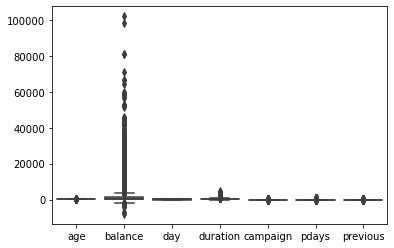

In [42]:
import seaborn as sns
sns.boxplot(data=bank_num)

### By Winsorising technique to treatment on data

In [43]:
column=bank_num.columns

In [44]:
for i in column:
    iqr=bank_num[i].quantile(0.75)-bank_num[i].quantile(0.25)
    ul=bank_num[i].quantile(0.75)+(1.5*iqr)
    ll=bank_num[i].quantile(0.25)-(1.5*iqr)
    bank_num[i].clip(upper=ul,lower=ll,inplace=True)
    

C:\Users\YOGESH\anaconda3\lib\site-packages\pandas\core\generic.py:7249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:>

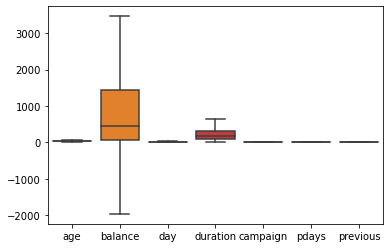

In [45]:
import seaborn as sns
sns.boxplot(data=bank_num)

### Taking Subset of categorical data

In [46]:
import numpy as np
bank_cat = bank[bank.select_dtypes(include=["object"]).columns.tolist()]

### Converting Categorical variable to number

In [47]:
from sklearn.preprocessing import LabelEncoder
bank_cat=bank_cat.apply(LabelEncoder().fit_transform)
bank_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0


### Combined the data

In [48]:
bank_combined=pd.concat([bank_num,bank_cat],axis=1)

In [49]:
bank_combined.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,58.0,2143.0,5,261.0,1.0,-1.0,0.0,4,1,2,0,1,0,2,8,3,0
1,44.0,29.0,5,151.0,1.0,-1.0,0.0,9,2,1,0,1,0,2,8,3,0
2,33.0,2.0,5,76.0,1.0,-1.0,0.0,2,1,1,0,1,1,2,8,3,0
3,47.0,1506.0,5,92.0,1.0,-1.0,0.0,1,1,3,0,1,0,2,8,3,0
4,33.0,1.0,5,198.0,1.0,-1.0,0.0,11,2,3,0,0,0,2,8,3,0


## Data Partition

In [50]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = bank_combined.drop(['y'],axis=1)
y = bank_combined[['y']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=200)

## Model Building 

In [14]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

## Plotting the tree

In [51]:
# combine the train data
train=pd.concat([y_train,X_train],axis=1)
train.head()

,y,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
12498,0,30.0,1717.0,2,218.0,2.0,-1.0,0.0,0,1,2,0,0,1,2,5,3
29040,0,60.0,358.0,2,95.0,1.0,-1.0,0.0,9,1,1,0,0,0,0,3,0
8798,0,29.0,-37.0,4,182.0,1.0,-1.0,0.0,1,2,1,0,1,0,2,6,3
16762,1,31.0,33.0,24,643.0,2.0,-1.0,0.0,1,1,0,0,1,0,0,5,3
34465,0,32.0,112.0,5,118.0,1.0,-1.0,0.0,4,2,2,0,1,0,0,8,3


In [52]:
# select the independent variable
features = list(train.columns[1:])
features

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

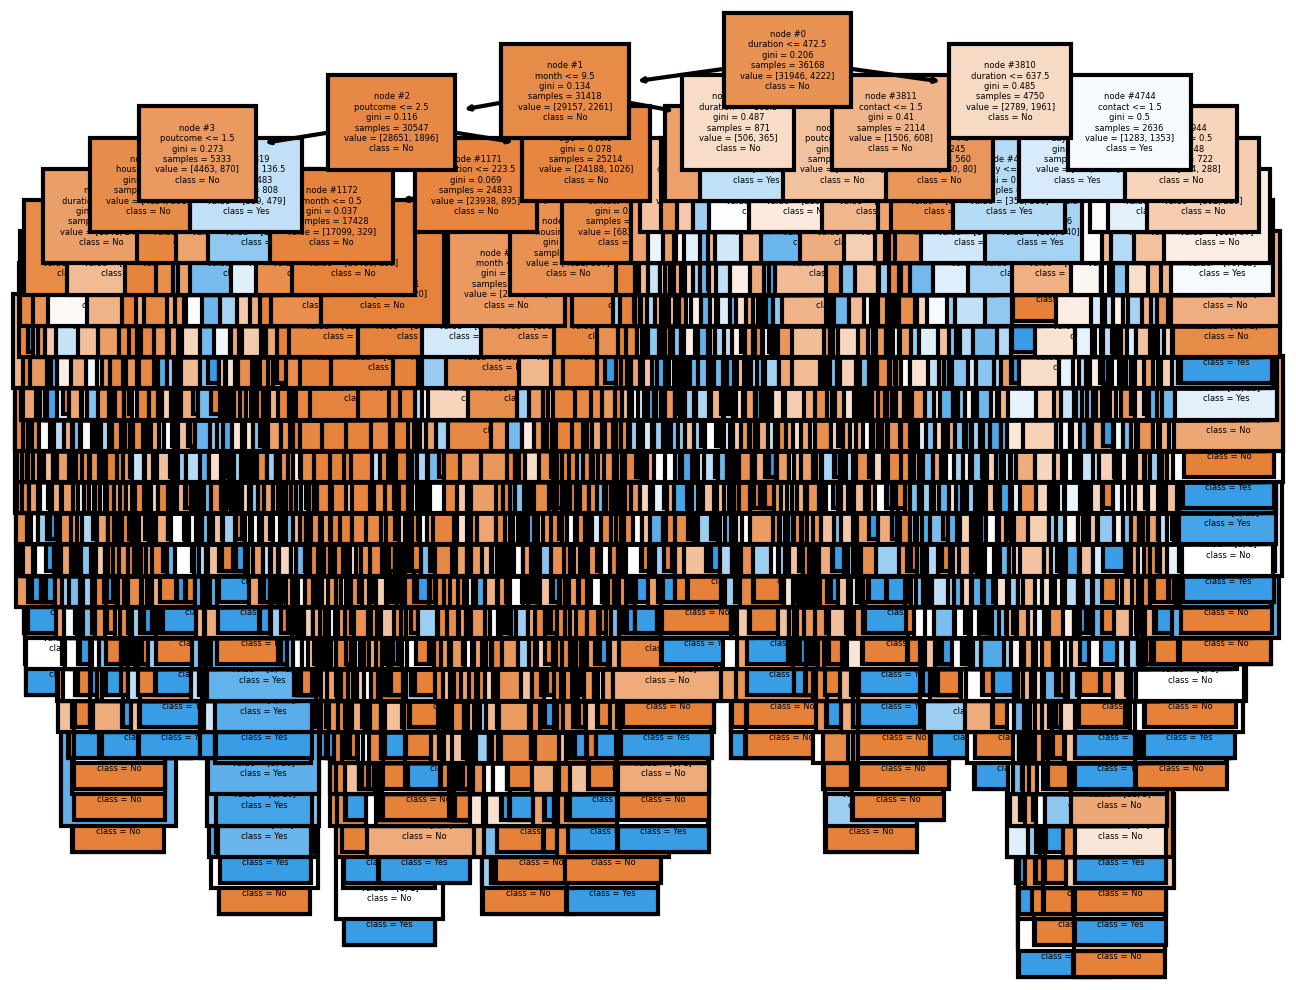

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt

y=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = features,  # column name
               class_names=y, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

### Strategy & Prediction
* Duration = Month-to-Month & Month<=68 & poutcome<= 2.5 
* client will not subscribe the term deposite

## Prediction on Train data

In [53]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,y,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Predicted
12498,0,30.0,1717.0,2,218.0,2.0,-1.0,0.0,0,1,2,0,0,1,2,5,3,0
29040,0,60.0,358.0,2,95.0,1.0,-1.0,0.0,9,1,1,0,0,0,0,3,0,0
8798,0,29.0,-37.0,4,182.0,1.0,-1.0,0.0,1,2,1,0,1,0,2,6,3,0
16762,1,31.0,33.0,24,643.0,2.0,-1.0,0.0,1,1,0,0,1,0,0,5,3,1
34465,0,32.0,112.0,5,118.0,1.0,-1.0,0.0,4,2,2,0,1,0,0,8,3,0


## Check Model Performance by using Confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['y'])
print(matrix)

[[31946     0]
 [    0  4222]]


### Final accuracy of Model Before Pruning

In [20]:
Accuracy_Train=((31946+4222)/(36168)*100)
print(Accuracy_Train)   # overfit or high accuracy

100.0


* The Model Accuracy is 100% 
* Model is overfitted.
* Apply the Prunning method to tackle overfitted model.
* By using Grid search method (Cross validation technique) to find the best estimator.

## Grid Search Method

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [1000, 2000,2700], ## Parent 
           'min_samples_leaf': [500,700,800], ## Child or Leave 
           'max_depth':[3,4,6]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [500, 700, 800],
                         'min_samples_split': [1000, 2000, 2700]},
             verbose=1)

#### Best estimator 

In [22]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=700,
                       min_samples_split=2000, random_state=42)

### Model Improvement by Pruning Method ( Cut Tree)

In [23]:
### Model Improvement by Pruning Method ( Cut Tree)#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=700, ## child
                                 min_samples_split=2000, #parent 
                                 max_depth=4)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=700,
                       min_samples_split=2000)

##  using best estimator Again Plot the Tree

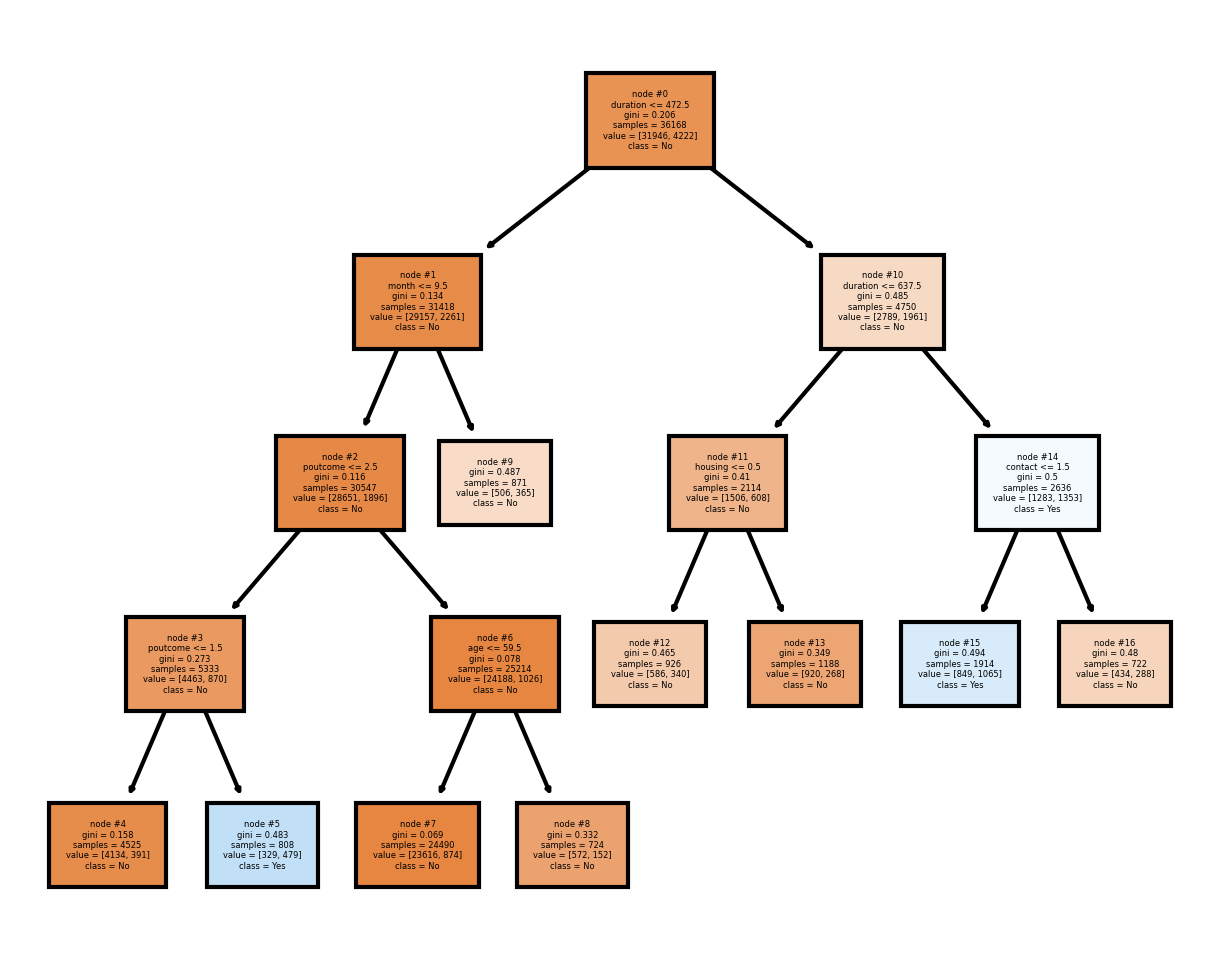

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

y=['No', 'Yes']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = features,  # column name
               class_names=y, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

### Strategy & Prediction
* (Duration<=472.5) ==>(month<=9.5) ==>(poutcome<=2.5) ==>(poutcome<=1.5) ==>(No)
* client will not subscribe the term deposite

## Prediction on Train data

In [25]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,y,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Predicted
12498,0,30.0,1717.0,2,218.0,2.0,-1.0,0.0,0,1,2,0,0,1,2,5,3,0
29040,0,60.0,358.0,2,95.0,1.0,-1.0,0.0,9,1,1,0,0,0,0,3,0,0
8798,0,29.0,-37.0,4,182.0,1.0,-1.0,0.0,1,2,1,0,1,0,2,6,3,0
16762,1,31.0,33.0,24,643.0,2.0,-1.0,0.0,1,1,0,0,1,0,0,5,3,1
34465,0,32.0,112.0,5,118.0,1.0,-1.0,0.0,4,2,2,0,1,0,0,8,3,0


## Check Model Performance by using Confusion matrix

In [26]:
#train data
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['y'])
print(matrix)

[[30768  2678]
 [ 1178  1544]]


### Final accuracy of model

In [27]:
#train data
Accuracy_Train=((30768+1544)/(36168)*100)
print(Accuracy_Train)   # overfit or high accuracy

89.33864189338642


* The Model Accuracy is 89% on train data.
* The Model is Good fitted.

# Sensitivity & Specificity on train data


In [54]:
from sklearn.metrics import classification_report
print(classification_report(train['y'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     31946
           1       0.57      0.37      0.44      4222

    accuracy                           0.89     36168
   macro avg       0.74      0.66      0.69     36168
weighted avg       0.88      0.89      0.88     36168



* Accuracy of  Model is 89%,Hence Model is good Fit 
* Accuracy of subscribe term deposite Capture by Model is 37% ( Sensitivity )
* Accuracy of not subscribe term depositeCapture by Model is 96% (Specificity)

## Prediction on Test data

In [28]:
test=pd.concat([X_test,y_test],axis=1)

In [29]:
test['Predicted']=dt.predict(X_test)
test.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y,Predicted
10243,45.0,1306.0,11,125.0,3.0,-1.0,0.0,7,1,1,0,0,0,2,6,3,0,0
7236,45.0,180.0,29,150.0,1.0,-1.0,0.0,1,1,0,0,1,1,2,8,3,0,0
6569,32.0,-71.0,28,78.0,2.0,-1.0,0.0,9,1,1,1,1,0,2,8,3,0,0
31047,22.0,381.0,12,227.0,1.0,-1.0,0.0,8,2,1,0,0,0,0,3,3,1,0
41379,62.0,816.0,1,28.0,2.0,-1.0,0.0,5,1,1,0,0,0,0,11,3,0,0


In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['y'])
print(confusion_matrix)

[[7658  677]
 [ 318  390]]


In [31]:
Accuracy_test=((7658+390)/(9043)*100)
Accuracy_test

88.99701426517748

# Sensitivity & Specificity on test data

In [33]:
from sklearn.metrics import classification_report
print(classification_report(test['y'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7976
           1       0.55      0.37      0.44      1067

    accuracy                           0.89      9043
   macro avg       0.73      0.66      0.69      9043
weighted avg       0.88      0.89      0.88      9043



* Accuracy of  Model is 89%,Hence Model is good Fit 
* Accuracy of subscribe term deposite Capture by Model is 37% ( Sensitivity )
* Accuracy of not subscribe term depositeCapture by Model is 96% (Specificity)

# Overall Accuracy

* Accuracy will building model is 89% 
* Performance of model on Test data is 89%